stackingのアンサンブル用シート

In [1]:
import pandas as pd


df_adachi = pd.read_csv('../data/handmade_data/block_aveprice_adachi2019.csv')
df_arakawa = pd.read_csv('../data/handmade_data/block_aveprice_arakawa2019.csv')
df_bunkyo = pd.read_csv('../data/handmade_data/block_aveprice_bunkyo2019.csv')
df_chiyoda = pd.read_csv('../data/handmade_data/block_aveprice_chiyoda2019.csv')
df_chuo = pd.read_csv('../data/handmade_data/block_aveprice_chuo2019.csv')
df_edogawa = pd.read_csv('../data/handmade_data/block_aveprice_edogawa2019.csv')
df_itabashi = pd.read_csv('../data/handmade_data/block_aveprice_itabashi2019.csv')
df_katsushika = pd.read_csv('../data/handmade_data/block_aveprice_katsushika2019.csv')
df_kita = pd.read_csv('../data/handmade_data/block_aveprice_kita2019.csv')
df_koto = pd.read_csv('../data/handmade_data/block_aveprice_koto2019.csv')
df_meguro = pd.read_csv('../data/handmade_data/block_aveprice_meguro2019.csv')
df_minato = pd.read_csv('../data/handmade_data/block_aveprice_minato2019.csv')
df_nakano = pd.read_csv('../data/handmade_data/block_aveprice_nakano2019.csv')
df_nerima = pd.read_csv('../data/handmade_data/block_aveprice_nerima2019.csv')
df_ota = pd.read_csv('../data/handmade_data/block_aveprice_ota2019.csv')
df_setagaya = pd.read_csv('../data/handmade_data/block_aveprice_setagaya2019.csv')
df_shibuya = pd.read_csv('../data/handmade_data/block_aveprice_shibuya2019.csv')
df_shinagawa = pd.read_csv('../data/handmade_data/block_aveprice_shinagawa2019.csv')
df_shinjuku = pd.read_csv('../data/handmade_data/block_aveprice_shinjuku2019.csv')
df_suginami = pd.read_csv('../data/handmade_data/block_aveprice_suginami2019.csv')
df_sumida = pd.read_csv('../data/handmade_data/block_aveprice_sumida2019.csv')
df_taito = pd.read_csv('../data/handmade_data/block_aveprice_taito2019.csv')
df_toshima = pd.read_csv('../data/handmade_data/block_aveprice_toshima2019.csv')

df_23wards = pd.concat([
    df_adachi,
    df_arakawa,
    df_bunkyo,
    df_chiyoda,
    df_chuo,
    df_edogawa,
    df_itabashi,
    df_katsushika,
    df_kita,
    df_koto,
    df_meguro,
    df_minato,
    df_nakano,
    df_nerima,
    df_ota,
    df_setagaya,
    df_shibuya,
    df_shinjuku,
    df_shinagawa,
    df_suginami,
    df_sumida,
    df_taito,
    df_toshima
],ignore_index=True)

addresses = pd.read_csv('../data/handmade_data/merge_address.csv')
addresses = addresses['所在地']
addresses = pd.DataFrame(addresses)

address_aveprice = pd.merge(addresses, df_23wards, left_on='所在地', right_on='0', how='left')
address_aveprice = address_aveprice[['所在地', '1']]
address_aveprice.columns = [['区町名', '平均地価']]

land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
land_aveprice.columns = ['平均地価']
test_land_aveprice.columns = ['平均地価']


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]]], axis=1)
y_train = rent
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D","S"]]], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D','S']

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


lightGBMとDARTとGOSSとXGBoostでstackingアンサンブルを行う。

In [2]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
sX_train, sX_valid, sy_train, sy_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [3]:
####LisgtGBM###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_LGBM = {
    'objective':'regression',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 4.430375245218262e-06,
    'max_bin': 502,
    'num_leaves': 97
}
model_LGBM = lgb.train(
                    params_LGBM,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=3000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###DART###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_DART = {
    'objective':'regression',
    'boosting_type':'dart',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 2.1600820741402023e-05,
    'max_bin': 556,
    'num_leaves': 126
}

model_DART = lgb.train(
                    params_DART,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=1000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###GOSS###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_GOSS = {
    'objective':'regression',
    'boosting_type':'goss',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 4.669226029558975e-07,
    'max_bin': 584,
    'num_leaves': 85
}

model_GOSS = lgb.train(
                    params_GOSS,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=1000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###XGBoost###
xgb_reg = xgboost.XGBRegressor(
    #目的関数の指定 初期値も二乗誤差です
                    objective='reg:linear',
                    #学習のラウンド数 early_stoppingを利用するので多めに指定
                    n_estimators=50000,
                    #boosterに何を用いるか 初期値もgbtreeです
                    booster='gbtree',
                    learning_rate=0.05,
                    max_depth=7,
                    random_state=0,
                    reg_alfa=2.054762512591133e-06,
                    sub_sample=0.5530198332197337,
                    colsample_bytree=0.7642417009494488,
                    min_child_weight=0.14135935551752302
)
xgb_reg.fit(sX_train, sy_train, eval_set=[(sX_valid, sy_valid)], early_stopping_rounds=10)

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'K', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' ar

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 14
[LightGBM] [Info] Start training from score 118575.175126
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 50511.5	valid_1's rmse: 47173.3
[20]	training's rmse: 36554.8	valid_1's rmse: 34357.2
[30]	training's rmse: 27718.5	valid_1's rmse: 27678.9
[40]	training's rmse: 21895.7	valid_1's rmse: 23455.8
[50]	training's rmse: 18480.9	valid_1's rmse: 21216
[60]	training's rmse: 16201.8	valid_1's rmse: 19959.1
[70]	training's rmse: 14759.3	valid_1's rmse: 19144.7
[80]	training's rmse: 13748	valid_1's rmse: 18632.3
[90]	training's rmse: 13001.9	valid_1's rmse: 18250.1
[100]	training's rmse: 12406.5	valid_1's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[20]	training's rmse: 39060.6	valid_1's rmse: 38386.1
[30]	training's rmse: 31370.9	valid_1's rmse: 32300.4
[40]	training's rmse: 28097.6	valid_1's rmse: 30064.5
[50]	training's rmse: 31488.4	valid_1's rmse: 33271.2
[60]	training's rmse: 35739.4	valid_1's rmse: 37504.2
[70]	training's rmse: 37646.7	valid_1's rmse: 39294.6
[80]	training's rmse: 32693.3	valid_1's rmse: 34700.5
[90]	training's rmse: 32554.9	valid_1's rmse: 34409.7
[100]	training's rmse: 34533.3	valid_1's rmse: 36461.8
[110]	training's rmse: 41327.6	valid_1's rmse: 42712
[120]	training's rmse: 33168.8	valid_1's rmse: 35604.5
[130]	training's rmse: 30080.5	valid_1's rmse: 32858.9
[140]	training's rmse: 32758.2	valid_1's rmse: 35347.7
[150]	training's rmse: 31275.1	valid_1's rmse: 33906.6
[160]	training's rmse: 35974.8	valid_1's rmse: 38104.3
[170]	training's rmse: 29090.7	valid_1's rmse: 32068.1
[180]	training's rmse: 27767.1	valid_1's rmse: 31113.5
[190]	training's rmse: 23772.2	valid_1's rmse: 27726.5
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:68785.59039
[16]	validation_0-rmse:66023.10751
[17]	validation_0-rmse:63305.05193
[18]	validation_0-rmse:60876.61611
[19]	validation_0-rmse:58440.02378
[20]	validation_0-rmse:56526.74184
[21]	validation_0-rmse:54541.82777
[22]	validation_0-rmse:52925.30037
[23]	validation_0-rmse:51141.56174
[24]	validation_0-rmse:49636.51780
[25]	validation_0-rmse:48034.42951
[26]	validation_0-rmse:46578.44929
[27]	validation_0-rmse:45363.79701
[28]	validation_0-rmse:44017.63525
[29]	validation_0-rmse:42952.96790
[30]	validation_0-rmse:41787.19960
[31]	validation_0-rmse:40922.97690
[32]	validation_0-rmse:40116.82153
[33]	validation_0-rmse:39010.35724
[34]	validation_0-rmse:38065.92642
[35]	validation_0-rmse:37371.72353
[36]	validation_0-rmse:36730.88944
[37]	validation_0-rmse:36004.77936
[38]	validation_0-rmse:35466.79956
[39]	validation_0-rmse:34968.01568
[40]	validation_0-rmse:34527.49734
[41]	validation_0-rmse:34083.33354
[42]	validation_0-rmse:33663.22061
[43]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7642417009494488, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
             min_child_weight=0.14135935551752302, missing=nan,
             monotone_constraints='()', n_estimators=50000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alfa=2.054762512591133e-06, ...)

ブレンドのモデルが重回帰分析の場合

In [31]:
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
# valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
# stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = LinearRegression()
# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
# pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
# pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
# stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
stack_test_pred = np.column_stack((pred_LGBM, pred_GOSS, pred_XGB))
print(stack_test_pred)

blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

[[138580.03774219 131631.84568007 118002.78125   ]
 [121670.7329273  121447.10733973 119678.2734375 ]
 [ 81581.16831512  83961.93487889  84770.125     ]
 ...
 [177533.51012032 174722.01942288 172593.78125   ]
 [264934.83305639 258337.94436019 277411.        ]
 [ 84175.95815483  82119.23128678  82911.5       ]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


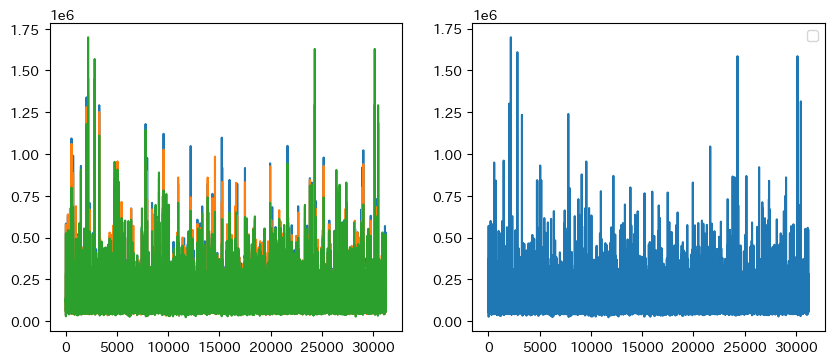

In [32]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
# ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')

ax2.plot(range(len(blend_pred)), blend_pred)

plt.legend(loc='best')
plt.show()

ブレンドのモデルがLGBMの場合

In [3]:
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
# valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
# stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB))
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = lgb.LGBMRegressor()
# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
# pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
# pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
# stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
stack_test_pred = np.column_stack((pred_LGBM, pred_GOSS, pred_XGB))
print(stack_test_pred)

blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

NameError: name 'model_LGBM' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


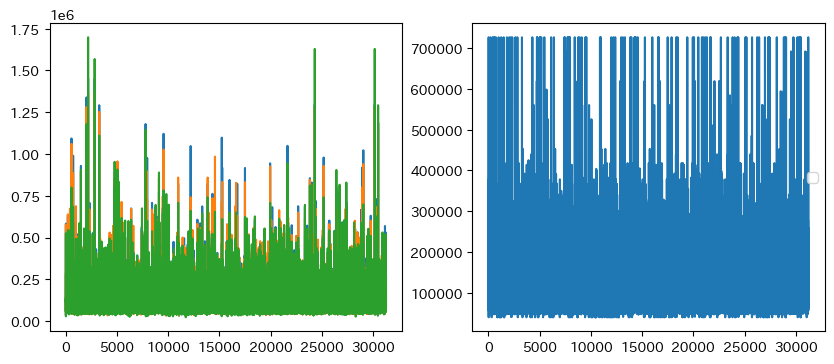

In [27]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
# ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')

ax2.plot(range(len(blend_pred)), blend_pred)

plt.legend(loc='best')
plt.show()

ファイル出力

In [36]:
df = pd.read_csv('test.csv')
id = df['id']
y_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('blend_result.csv',index=False)

### GBDTとDARTとGOSSとXGBoostでstackingアンサンブルを行う。(交差検証ver)

In [1]:
import pandas as pd


df_adachi = pd.read_csv('../data/handmade_data/block_aveprice_adachi2019.csv')
df_arakawa = pd.read_csv('../data/handmade_data/block_aveprice_arakawa2019.csv')
df_bunkyo = pd.read_csv('../data/handmade_data/block_aveprice_bunkyo2019.csv')
df_chiyoda = pd.read_csv('../data/handmade_data/block_aveprice_chiyoda2019.csv')
df_chuo = pd.read_csv('../data/handmade_data/block_aveprice_chuo2019.csv')
df_edogawa = pd.read_csv('../data/handmade_data/block_aveprice_edogawa2019.csv')
df_itabashi = pd.read_csv('../data/handmade_data/block_aveprice_itabashi2019.csv')
df_katsushika = pd.read_csv('../data/handmade_data/block_aveprice_katsushika2019.csv')
df_kita = pd.read_csv('../data/handmade_data/block_aveprice_kita2019.csv')
df_koto = pd.read_csv('../data/handmade_data/block_aveprice_koto2019.csv')
df_meguro = pd.read_csv('../data/handmade_data/block_aveprice_meguro2019.csv')
df_minato = pd.read_csv('../data/handmade_data/block_aveprice_minato2019.csv')
df_nakano = pd.read_csv('../data/handmade_data/block_aveprice_nakano2019.csv')
df_nerima = pd.read_csv('../data/handmade_data/block_aveprice_nerima2019.csv')
df_ota = pd.read_csv('../data/handmade_data/block_aveprice_ota2019.csv')
df_setagaya = pd.read_csv('../data/handmade_data/block_aveprice_setagaya2019.csv')
df_shibuya = pd.read_csv('../data/handmade_data/block_aveprice_shibuya2019.csv')
df_shinagawa = pd.read_csv('../data/handmade_data/block_aveprice_shinagawa2019.csv')
df_shinjuku = pd.read_csv('../data/handmade_data/block_aveprice_shinjuku2019.csv')
df_suginami = pd.read_csv('../data/handmade_data/block_aveprice_suginami2019.csv')
df_sumida = pd.read_csv('../data/handmade_data/block_aveprice_sumida2019.csv')
df_taito = pd.read_csv('../data/handmade_data/block_aveprice_taito2019.csv')
df_toshima = pd.read_csv('../data/handmade_data/block_aveprice_toshima2019.csv')

df_23wards = pd.concat([
    df_adachi,
    df_arakawa,
    df_bunkyo,
    df_chiyoda,
    df_chuo,
    df_edogawa,
    df_itabashi,
    df_katsushika,
    df_kita,
    df_koto,
    df_meguro,
    df_minato,
    df_nakano,
    df_nerima,
    df_ota,
    df_setagaya,
    df_shibuya,
    df_shinjuku,
    df_shinagawa,
    df_suginami,
    df_sumida,
    df_taito,
    df_toshima
],ignore_index=True)

addresses = pd.read_csv('../data/handmade_data/merge_address.csv')
addresses = addresses['所在地']
addresses = pd.DataFrame(addresses)

address_aveprice = pd.merge(addresses, df_23wards, left_on='所在地', right_on='0', how='left')
address_aveprice = address_aveprice[['所在地', '1']]
address_aveprice.columns = [['区町名', '平均地価']]

land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
land_aveprice.columns = ['平均地価']
test_land_aveprice.columns = ['平均地価']


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]]], axis=1)
y_train = rent
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D","S"]]], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D','S']

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [14]:
X_train

,築年数,面積,契約期間,定期借家,所在階,全体の階数,最寄り駅,所要時間,平均地価,所在地,部屋数,L,D,S
6321,29.0,57.24,2.0,1,2.0,NaN,68,11.0,3.671667e+05,442,2,1,1,0
17128,0.0,36.53,2.0,2,2.0,2.0,228,9.0,6.055000e+05,307,1,0,1,0
2821,2.0,40.85,2.0,1,7.0,10.0,76,8.0,2.500000e+06,141,1,1,1,0
23898,0.0,41.63,NaN,3,1.0,2.0,242,10.0,4.296667e+05,321,1,1,1,0
29824,125.0,54.49,2.0,1,3.0,10.0,83,3.0,5.766667e+05,341,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30985,212.0,22.35,2.0,1,1.0,2.0,1,9.0,NaN,608,1,0,0,0
26684,6.0,36.50,2.0,1,2.0,7.0,78,10.0,1.114800e+06,80,1,1,1,0
26700,155.0,20.91,2.0,1,5.0,10.0,255,6.0,9.330000e+05,487,1,0,0,0
29486,68.0,25.25,2.0,1,2.0,3.0,73,7.0,1.558583e+06,73,1,0,0,0


In [12]:
#このスタッキングのアルゴリズムでは、ブレンドモデルの学習用データとして使用するvalidデータが、ブレンド前の個々のモデルの既知のデータになってしまっている。
##その解消のためには、train_test_splitとクロスバリデーションの併用が必要だと思うがなかなかうまくいかない。
###インデックスの振り直しが必要・・・？
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
cv = KFold(n_splits=5, shuffle=True, random_state=0)
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    print(X_train)
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    ####LisgtGBM###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_LGBM = {
        'objective':'regression',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97
    }
    model_LGBM = lgb.train(
                        params_LGBM,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )

    ###DART###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_DART = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.1600820741402023e-05,
        'max_bin': 556,
        'num_leaves': 126
    }

    model_DART = lgb.train(
                        params_DART,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=2000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )

    ###GOSS###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GOSS = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.669226029558975e-07,
        'max_bin': 584,
        'num_leaves': 85
    }

    model_GOSS = lgb.train(
                        params_GOSS,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )

    ###XGBoost###
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        objective='reg:linear',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='gbtree',
                        learning_rate=0.05,
                        max_depth=7,
                        random_state=0,
                        reg_alfa=2.054762512591133e-06,
                        sub_sample=0.5530198332197337,
                        colsample_bytree=0.7642417009494488,
                        min_child_weight=0.14135935551752302
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=10)

_, X_valid, _, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = lgb.LGBMRegressor()

# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
print("ブレンドモデルに入れるテストデータ",stack_test_pred)

#ブレンドモデルによる最終の予測値
blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

         築年数     面積  契約期間  定期借家  所在階  全体の階数  最寄り駅  所要時間          平均地価  所在地  \
6321    29.0  57.24   2.0     1  2.0    NaN    68  11.0  3.671667e+05  442   
17128    0.0  36.53   2.0     2  2.0    2.0   228   9.0  6.055000e+05  307   
2821     2.0  40.85   2.0     1  7.0   10.0    76   8.0  2.500000e+06  141   
23898    0.0  41.63   NaN     3  1.0    2.0   242  10.0  4.296667e+05  321   
29824  125.0  54.49   2.0     1  3.0   10.0    83   3.0  5.766667e+05  341   
...      ...    ...   ...   ...  ...    ...   ...   ...           ...  ...   
30985  212.0  22.35   2.0     1  1.0    2.0     1   9.0           NaN  608   
26684    6.0  36.50   2.0     1  2.0    7.0    78  10.0  1.114800e+06   80   
26700  155.0  20.91   2.0     1  5.0   10.0   255   6.0  9.330000e+05  487   
29486   68.0  25.25   2.0     1  2.0    3.0    73   7.0  1.558583e+06   73   
12005   53.0  20.03   NaN     3  1.0    3.0   329   6.0  5.652857e+05   97   

       部屋数  L  D  S  
6321     2  1  1  0  
17128    1  0  1  0

KeyError: '[0, 1, 2, 4, 6, 7, 8, 13, 17, 20, 22, 27, 28, 31, 34, 35, 36, 37, 38, 41, 43, 44, 45, 47, 49, 53, 55, 56, 57, 58, 59, 60, 62, 63, 65, 66, 67, 69, 70, 73, 74, 76, 81, 83, 84, 88, 91, 92, 93, 95, 100, 108, 110, 112, 113, 114, 116, 117, 120, 128, 129, 130, 135, 138, 143, 145, 147, 151, 152, 153, 155, 156, 158, 160, 161, 162, 163, 168, 169, 172, 173, 175, 178, 181, 183, 184, 185, 191, 193, 195, 196, 198, 200, 202, 204, 206, 208, 211, 213, 215, 216, 217, 218, 219, 222, 223, 224, 228, 231, 232, 234, 241, 244, 248, 250, 251, 252, 254, 255, 257, 259, 260, 261, 268, 269, 271, 274, 276, 281, 282, 283, 285, 290, 291, 293, 295, 297, 299, 301, 305, 310, 311, 314, 315, 316, 317, 318, 319, 321, 322, 323, 325, 326, 327, 330, 333, 339, 341, 342, 344, 348, 349, 350, 351, 353, 355, 356, 358, 359, 362, 365, 370, 372, 373, 375, 383, 385, 388, 390, 392, 394, 398, 400, 401, 408, 409, 410, 411, 412, 413, 414, 415, 416, 418, 420, 425, 426, 427, 429, 430, 431, 433, 434, 435, 436, 438, 439, 447, 453, 455, 456, 459, 461, 463, 468, 470, 471, 472, 473, 474, 482, 484, 485, 490, 492, 494, 496, 497, 498, 502, 505, 506, 507, 508, 512, 513, 515, 516, 517, 518, 520, 523, 524, 525, 529, 533, 535, 542, 543, 544, 545, 549, 550, 551, 557, 558, 559, 560, 562, 567, 569, 570, 572, 574, 581, 582, 583, 585, 586, 587, 590, 591, 593, 594, 601, 603, 604, 606, 608, 610, 612, 615, 616, 617, 618, 619, 628, 630, 631, 645, 646, 650, 653, 660, 661, 666, 668, 670, 672, 673, 679, 681, 682, 683, 684, 685, 689, 692, 693, 695, 697, 699, 700, 701, 709, 711, 712, 714, 717, 718, 723, 726, 727, 728, 729, 730, 731, 735, 736, 737, 740, 741, 743, 746, 747, 753, 754, 757, 759, 761, 763, 764, 766, 767, 768, 770, 775, 777, 778, 782, 784, 785, 789, 790, 791, 793, 794, 795, 796, 800, 801, 802, 805, 806, 807, 809, 810, 811, 814, 815, 816, 817, 819, 820, 821, 824, 825, 826, 829, 830, 831, 832, 836, 837, 838, 840, 843, 846, 849, 852, 855, 856, 857, 858, 859, 860, 863, 864, 867, 868, 872, 875, 878, 880, 881, 883, 885, 887, 892, 894, 899, 902, 903, 905, 906, 907, 908, 910, 911, 912, 913, 914, 916, 917, 918, 919, 920, 922, 923, 924, 925, 926, 927, 929, 931, 933, 934, 935, 936, 945, 946, 948, 951, 953, 954, 956, 958, 959, 963, 964, 965, 971, 972, 975, 977, 980, 986, 990, 991, 995, 998, 999, 1002, 1006, 1007, 1008, 1009, 1011, 1012, 1013, 1015, 1019, 1024, 1025, 1026, 1030, 1031, 1034, 1036, 1039, 1042, 1044, 1045, 1047, 1052, 1057, 1062, 1064, 1068, 1070, 1078, 1079, 1080, 1081, 1083, 1086, 1092, 1099, 1102, 1104, 1108, 1109, 1111, 1113, 1114, 1116, 1119, 1122, 1123, 1125, 1127, 1128, 1129, 1130, 1131, 1132, 1134, 1142, 1147, 1148, 1149, 1150, 1151, 1152, 1155, 1157, 1158, 1159, 1162, 1165, 1166, 1169, 1174, 1176, 1177, 1178, 1182, 1183, 1185, 1187, 1190, 1197, 1198, 1199, 1200, 1202, 1203, 1205, 1206, 1208, 1214, 1215, 1216, 1219, 1221, 1222, 1223, 1225, 1226, 1227, 1229, 1231, 1232, 1240, 1243, 1244, 1246, 1247, 1248, 1249, 1251, 1254, 1257, 1258, 1260, 1262, 1263, 1264, 1265, 1266, 1267, 1270, 1271, 1274, 1275, 1276, 1277, 1278, 1279, 1284, 1290, 1296, 1300, 1302, 1303, 1306, 1307, 1309, 1311, 1313, 1314, 1315, 1316, 1317, 1321, 1322, 1324, 1325, 1326, 1329, 1333, 1338, 1340, 1341, 1342, 1344, 1345, 1348, 1353, 1354, 1356, 1359, 1361, 1362, 1365, 1367, 1369, 1370, 1371, 1372, 1374, 1375, 1377, 1380, 1381, 1382, 1388, 1389, 1390, 1391, 1392, 1394, 1396, 1398, 1405, 1408, 1409, 1412, 1413, 1416, 1419, 1422, 1423, 1428, 1431, 1434, 1435, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1447, 1448, 1449, 1450, 1456, 1459, 1461, 1463, 1465, 1469, 1470, 1471, 1473, 1474, 1475, 1477, 1479, 1481, 1482, 1483, 1485, 1486, 1487, 1489, 1491, 1493, 1497, 1499, 1500, 1502, 1505, 1506, 1508, 1510, 1511, 1513, 1514, 1518, 1519, 1524, 1525, 1526, 1527, 1531, 1532, 1533, 1535, 1536, 1537, 1538, 1539, 1541, 1547, 1548, 1549, 1551, 1552, 1553, 1560, 1561, 1564, 1571, 1574, 1577, 1579, 1580, 1582, 1583, 1584, 1589, 1591, 1599, 1600, 1601, 1602, 1603, 1606, 1614, 1619, 1620, 1621, 1622, 1625, 1626, 1630, 1631, 1633, 1639, 1644, 1646, 1648, 1649, 1650, 1653, 1655, 1657, 1659, 1661, 1664, 1666, 1671, 1673, 1674, 1677, 1679, 1680, 1682, 1684, 1685, 1687, 1688, 1689, 1691, 1692, 1694, 1696, 1699, 1700, 1702, 1703, 1705, 1707, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1721, 1724, 1725, 1728, 1730, 1732, 1734, 1736, 1740, 1741, 1742, 1744, 1752, 1754, 1755, 1759, 1760, 1763, 1769, 1772, 1773, 1779, 1781, 1784, 1786, 1787, 1790, 1791, 1792, 1794, 1797, 1799, 1800, 1801, 1802, 1804, 1806, 1807, 1809, 1812, 1813, 1814, 1821, 1824, 1827, 1828, 1832, 1834, 1836, 1846, 1847, 1849, 1850, 1855, 1857, 1859, 1862, 1863, 1867, 1868, 1871, 1873, 1875, 1876, 1880, 1883, 1884, 1885, 1888, 1890, 1891, 1893, 1894, 1897, 1900, 1903, 1904, 1905, 1907, 1909, 1916, 1917, 1918, 1920, 1922, 1925, 1929, 1931, 1934, 1937, 1938, 1939, 1940, 1942, 1944, 1946, 1947, 1948, 1949, 1951, 1952, 1953, 1958, 1959, 1960, 1963, 1964, 1965, 1971, 1973, 1977, 1979, 1980, 1981, 1982, 1984, 1986, 1987, 1990, 1991, 1993, 1996, 1999, 2002, 2006, 2008, 2010, 2013, 2014, 2015, 2018, 2019, 2020, 2021, 2025, 2026, 2028, 2034, 2035, 2037, 2038, 2039, 2040, 2044, 2045, 2048, 2049, 2050, 2051, 2055, 2056, 2058, 2059, 2063, 2067, 2069, 2071, 2075, 2077, 2080, 2084, 2091, 2093, 2094, 2095, 2099, 2100, 2103, 2106, 2108, 2109, 2111, 2114, 2115, 2122, 2123, 2124, 2130, 2132, 2133, 2135, 2139, 2143, 2144, 2145, 2146, 2151, 2156, 2159, 2161, 2166, 2168, 2169, 2173, 2174, 2178, 2179, 2181, 2184, 2188, 2189, 2190, 2194, 2196, 2197, 2198, 2202, 2203, 2204, 2205, 2209, 2210, 2212, 2213, 2216, 2218, 2219, 2220, 2223, 2226, 2230, 2231, 2232, 2235, 2236, 2237, 2239, 2240, 2242, 2244, 2245, 2246, 2251, 2254, 2255, 2256, 2257, 2258, 2262, 2264, 2265, 2266, 2267, 2269, 2274, 2275, 2277, 2281, 2282, 2285, 2290, 2292, 2294, 2298, 2299, 2300, 2302, 2304, 2306, 2307, 2308, 2309, 2311, 2314, 2316, 2318, 2319, 2321, 2323, 2325, 2329, 2331, 2332, 2334, 2336, 2338, 2340, 2342, 2344, 2345, 2350, 2355, 2356, 2358, 2360, 2361, 2363, 2366, 2367, 2370, 2371, 2374, 2376, 2377, 2378, 2381, 2383, 2385, 2387, 2388, 2389, 2393, 2396, 2397, 2398, 2403, 2404, 2407, 2411, 2414, 2415, 2420, 2425, 2429, 2431, 2433, 2439, 2441, 2444, 2446, 2450, 2451, 2455, 2459, 2460, 2462, 2463, 2464, 2468, 2469, 2479, 2481, 2482, 2483, 2485, 2487, 2488, 2491, 2493, 2494, 2496, 2502, 2504, 2508, 2511, 2514, 2516, 2518, 2519, 2521, 2525, 2526, 2527, 2533, 2534, 2537, 2543, 2546, 2549, 2552, 2558, 2561, 2565, 2566, 2567, 2568, 2571, 2574, 2575, 2577, 2580, 2582, 2583, 2586, 2588, 2591, 2592, 2596, 2600, 2605, 2606, 2610, 2612, 2614, 2615, 2620, 2621, 2622, 2628, 2629, 2631, 2632, 2634, 2635, 2636, 2638, 2639, 2642, 2644, 2645, 2648, 2649, 2650, 2652, 2653, 2654, 2655, 2657, 2659, 2660, 2661, 2665, 2666, 2668, 2669, 2670, 2671, 2674, 2675, 2677, 2678, 2679, 2680, 2685, 2690, 2692, 2697, 2699, 2700, 2703, 2704, 2708, 2710, 2711, 2714, 2715, 2717, 2718, 2725, 2728, 2731, 2732, 2733, 2734, 2735, 2737, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2747, 2748, 2750, 2751, 2753, 2756, 2758, 2759, 2764, 2765, 2769, 2770, 2772, 2775, 2776, 2777, 2779, 2780, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2792, 2793, 2794, 2795, 2798, 2800, 2802, 2806, 2808, 2810, 2814, 2815, 2816, 2819, 2822, 2825, 2829, 2830, 2831, 2832, 2834, 2835, 2836, 2838, 2842, 2843, 2844, 2849, 2852, 2853, 2854, 2855, 2858, 2859, 2860, 2861, 2868, 2870, 2871, 2872, 2874, 2881, 2882, 2886, 2887, 2889, 2899, 2900, 2901, 2902, 2903, 2906, 2907, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2921, 2924, 2925, 2929, 2930, 2931, 2933, 2935, 2939, 2944, 2946, 2951, 2953, 2955, 2956, 2957, 2961, 2964, 2966, 2967, 2968, 2969, 2972, 2973, 2974, 2980, 2985, 2986, 2987, 2989, 2994, 3000, 3001, 3003, 3004, 3009, 3011, 3012, 3013, 3014, 3022, 3026, 3028, 3031, 3033, 3036, 3044, 3046, 3048, 3049, 3052, 3053, 3054, 3056, 3060, 3062, 3064, 3068, 3069, 3070, 3074, 3075, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3096, 3099, 3100, 3102, 3103, 3104, 3105, 3106, 3107, 3110, 3113, 3114, 3115, 3116, 3118, 3120, 3122, 3123, 3124, 3127, 3128, 3134, 3135, 3136, 3137, 3138, 3141, 3142, 3143, 3145, 3146, 3153, 3156, 3157, 3160, 3164, 3165, 3167, 3169, 3171, 3174, 3175, 3178, 3179, 3182, 3184, 3187, 3189, 3193, 3195, 3196, 3198, 3199, 3202, 3205, 3207, 3208, 3211, 3215, 3216, 3222, 3224, 3226, 3230, 3232, 3235, 3236, 3238, 3240, 3241, 3242, 3248, 3249, 3250, 3251, 3252, 3254, 3255, 3257, 3261, 3265, 3266, 3268, 3270, 3271, 3272, 3275, 3277, 3278, 3280, 3286, 3288, 3290, 3292, 3293, 3295, 3298, 3302, 3305, 3306, 3307, 3308, 3309, 3310, 3312, 3313, 3314, 3316, 3318, 3319, 3320, 3321, 3323, 3325, 3326, 3327, 3333, 3336, 3337, 3341, 3342, 3344, 3345, 3346, 3348, 3349, 3351, 3352, 3354, 3357, 3359, 3360, 3361, 3364, 3368, 3369, 3370, 3372, 3374, 3376, 3377, 3379, 3384, 3385, 3392, 3393, 3394, 3395, 3396, 3398, 3399, 3400, 3401, 3402, 3403, 3405, 3408, 3409, 3410, 3413, 3414, 3415, 3416, 3417, 3421, 3423, 3424, 3432, 3433, 3435, 3436, 3439, 3440, 3442, 3445, 3446, 3447, 3452, 3453, 3460, 3461, 3463, 3465, 3466, 3467, 3468, 3470, 3472, 3473, 3475, 3476, 3477, 3478, 3479, 3482, 3483, 3484, 3486, 3489, 3490, 3493, 3500, 3501, 3503, 3504, 3507, 3508, 3509, 3512, 3513, 3514, 3516, 3518, 3519, 3521, 3522, 3525, 3527, 3529, 3534, 3539, 3543, 3544, 3545, 3549, 3551, 3555, 3557, 3559, 3562, 3565, 3566, 3570, 3573, 3574, 3576, 3581, 3582, 3584, 3586, 3587, 3589, 3590, 3591, 3594, 3595, 3596, 3597, 3599, 3602, 3603, 3606, 3607, 3609, 3610, 3612, 3613, 3616, 3617, 3618, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3631, 3632, 3637, 3639, 3640, 3641, 3642, 3644, 3647, 3648, 3651, 3653, 3656, 3659, 3660, 3661, 3665, 3668, 3670, 3675, 3677, 3678, 3682, 3683, 3687, 3688, 3695, 3700, 3703, 3705, 3711, 3712, 3717, 3718, 3720, 3721, 3722, 3723, 3724, 3726, 3727, 3729, 3732, 3735, 3736, 3738, 3739, 3740, 3742, 3745, 3746, 3751, 3757, 3760, 3763, 3764, 3767, 3773, 3774, 3775, 3780, 3785, 3786, 3787, 3788, 3791, 3796, 3798, 3799, 3801, 3804, 3806, 3808, 3810, 3812, 3813, 3817, 3818, 3819, 3820, 3822, 3825, 3828, 3829, 3832, 3833, 3834, 3836, 3838, 3839, 3841, 3844, 3847, 3849, 3850, 3854, 3855, 3864, 3865, 3867, 3869, 3870, 3874, 3875, 3876, 3877, 3879, 3881, 3882, 3886, 3889, 3890, 3895, 3896, 3897, 3902, 3903, 3904, 3905, 3906, 3909, 3911, 3913, 3915, 3918, 3919, 3920, 3922, 3923, 3927, 3928, 3929, 3935, 3937, 3938, 3939, 3941, 3943, 3944, 3945, 3946, 3947, 3949, 3950, 3951, 3954, 3958, 3962, 3967, 3968, 3969, 3971, 3973, 3976, 3977, 3980, 3981, 3983, 3984, 3985, 3986, 3987, 3991, 3992, 3995, 4007, 4009, 4010, 4013, 4014, 4020, 4021, 4023, 4028, 4029, 4031, 4032, 4033, 4034, 4035, 4037, 4040, 4042, 4043, 4044, 4046, 4051, 4055, 4056, 4057, 4058, 4065, 4066, 4068, 4078, 4079, 4080, 4082, 4083, 4091, 4094, 4095, 4098, 4099, 4103, 4106, 4108, 4112, 4113, 4117, 4120, 4121, 4122, 4125, 4127, 4128, 4131, 4132, 4133, 4137, 4142, 4148, 4150, 4154, 4155, 4158, 4159, 4162, 4164, 4165, 4167, 4168, 4169, 4172, 4173, 4174, 4175, 4178, 4179, 4180, 4183, 4185, 4186, 4187, 4189, 4191, 4195, 4198, 4199, 4200, 4201, 4205, 4206, 4211, 4213, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4225, 4226, 4228, 4229, 4231, 4234, 4237, 4239, 4240, 4241, 4243, 4244, 4246, 4249, 4253, 4255, 4257, 4259, 4261, 4262, 4263, 4264, 4270, 4271, 4272, 4273, 4276, 4280, 4285, 4286, 4288, 4291, 4293, 4294, 4298, 4303, 4305, 4306, 4309, 4310, 4312, 4315, 4320, 4326, 4327, 4329, 4332, 4334, 4335, 4337, 4338, 4339, 4342, 4348, 4349, 4352, 4353, 4354, 4355, 4357, 4361, 4362, 4363, 4367, 4369, 4372, 4375, 4377, 4378, 4380, 4389, 4390, 4391, 4394, 4395, 4396, 4397, 4402, 4403, 4404, 4405, 4407, 4413, 4414, 4415, 4416, 4417, 4423, 4431, 4433, 4434, 4436, 4440, 4441, 4444, 4449, 4451, 4452, 4453, 4454, 4455, 4456, 4458, 4460, 4463, 4464, 4466, 4467, 4468, 4471, 4472, 4475, 4476, 4478, 4481, 4484, 4485, 4486, 4488, 4490, 4491, 4494, 4496, 4501, 4502, 4504, 4505, 4507, 4509, 4510, 4513, 4520, 4522, 4524, 4525, 4530, 4531, 4532, 4533, 4534, 4536, 4538, 4541, 4545, 4546, 4550, 4551, 4554, 4557, 4562, 4563, 4566, 4567, 4568, 4571, 4572, 4573, 4577, 4579, 4580, 4582, 4586, 4588, 4592, 4598, 4599, 4601, 4603, 4605, 4606, 4609, 4611, 4614, 4620, 4621, 4623, 4624, 4625, 4627, 4629, 4630, 4631, 4640, 4644, 4646, 4647, 4652, 4660, 4662, 4663, 4669, 4671, 4677, 4679, 4681, 4682, 4684, 4685, 4686, 4688, 4689, 4693, 4696, 4700, 4702, 4704, 4705, 4707, 4714, 4715, 4717, 4718, 4720, 4721, 4722, 4723, 4725, 4729, 4733, 4734, 4737, 4738, 4739, 4740, 4743, 4747, 4749, 4750, 4751, 4753, 4754, 4757, 4758, 4760, 4762, 4766, 4767, 4768, 4769, 4771, 4773, 4778, 4779, 4780, 4781, 4784, 4786, 4788, 4793, 4794, 4797, 4798, 4800, 4803, 4804, 4806, 4807, 4812, 4813, 4814, 4816, 4817, 4819, 4821, 4822, 4824, 4825, 4827, 4828, 4829, 4830, 4831, 4832, 4836, 4838, 4839, 4842, 4843, 4844, 4845, 4847, 4849, 4850, 4852, 4853, 4857, 4859, 4861, 4865, 4866, 4868, 4869, 4874, 4875, 4876, 4878, 4879, 4881, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4893, 4895, 4897, 4899, 4900, 4903, 4904, 4907, 4908, 4909, 4910, 4912, 4917, 4918, 4919, 4920, 4923, 4924, 4925, 4928, 4931, 4933, 4935, 4936, 4937, 4940, 4941, 4944, 4947, 4952, 4953, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4964, 4967, 4969, 4970, 4972, 4973, 4978, 4980, 4981, 4984, 4987, 4997, 4998, 5005, 5007, 5008, 5009, 5011, 5012, 5014, 5015, 5020, 5022, 5024, 5026, 5027, 5029, 5030, 5032, 5038, 5039, 5041, 5045, 5047, 5051, 5052, 5053, 5056, 5057, 5059, 5060, 5061, 5065, 5068, 5071, 5073, 5074, 5076, 5079, 5081, 5082, 5084, 5085, 5088, 5091, 5092, 5093, 5095, 5096, 5098, 5100, 5108, 5109, 5110, 5111, 5112, 5115, 5116, 5121, 5122, 5123, 5124, 5127, 5128, 5129, 5132, 5142, 5143, 5146, 5148, 5153, 5156, 5157, 5160, 5162, 5163, 5164, 5165, 5167, 5170, 5171, 5176, 5177, 5179, 5181, 5182, 5183, 5188, 5190, 5192, 5194, 5195, 5199, 5203, 5207, 5209, 5212, 5215, 5217, 5219, 5223, 5224, 5225, 5229, 5231, 5232, 5233, 5237, 5238, 5240, 5246, 5247, 5249, 5250, 5255, 5261, 5262, 5264, 5265, 5266, 5268, 5274, 5276, 5279, 5281, 5282, 5284, 5285, 5288, 5289, 5292, 5294, 5295, 5297, 5298, 5300, 5301, 5304, 5308, 5309, 5311, 5313, 5314, 5317, 5318, 5321, 5323, 5325, 5326, 5327, 5328, 5329, 5331, 5332, 5333, 5334, 5335, 5339, 5340, 5345, 5346, 5347, 5356, 5357, 5358, 5363, 5366, 5368, 5369, 5370, 5371, 5372, 5374, 5376, 5379, 5385, 5387, 5388, 5391, 5392, 5393, 5394, 5395, 5396, 5397, 5400, 5402, 5403, 5405, 5407, 5409, 5411, 5415, 5419, 5422, 5426, 5427, 5430, 5431, 5432, 5435, 5437, 5439, 5440, 5442, 5444, 5445, 5448, 5450, 5453, 5457, 5458, 5461, 5466, 5468, 5469, 5472, 5473, 5475, 5476, 5477, 5479, 5480, 5483, 5485, 5486, 5487, 5488, 5491, 5492, 5493, 5495, 5497, 5504, 5507, 5509, 5511, 5512, 5523, 5529, 5530, 5531, 5532, 5534, 5538, 5539, 5541, 5542, 5549, 5550, 5551, 5553, 5554, 5556, 5559, 5563, 5565, 5566, 5567, 5570, 5574, 5577, 5580, 5581, 5587, 5588, 5594, 5597, 5598, 5602, 5603, 5604, 5608, 5611, 5612, 5616, 5620, 5621, 5623, 5624, 5628, 5629, 5631, 5634, 5635, 5637, 5639, 5641, 5642, 5643, 5645, 5646, 5648, 5649, 5650, 5652, 5658, 5661, 5663, 5665, 5670, 5671, 5672, 5676, 5679, 5681, 5685, 5689, 5691, 5693, 5694, 5695, 5697, 5701, 5702, 5703, 5709, 5710, 5715, 5716, 5719, 5721, 5722, 5723, 5725, 5726, 5727, 5728, 5729, 5733, 5734, 5737, 5738, 5742, 5748, 5749, 5751, 5754, 5757, 5759, 5761, 5763, 5765, 5766, 5767, 5768, 5769, 5770, 5772, 5774, 5775, 5777, 5780, 5781, 5782, 5783, 5788, 5790, 5791, 5794, 5797, 5800, 5801, 5805, 5806, 5808, 5809, 5810, 5812, 5814, 5815, 5816, 5819, 5820, 5821, 5823, 5824, 5825, 5826, 5827, 5828, 5830, 5831, 5832, 5834, 5835, 5836, 5839, 5840, 5842, 5846, 5848, 5850, 5851, 5852, 5853, 5855, 5857, 5858, 5859, 5860, 5861, 5865, 5867, 5868, 5870, 5871, 5873, 5874, 5877, 5882, 5884, 5886, 5887, 5888, 5889, 5891, 5894, 5895, 5899, 5902, 5903, 5904, 5907, 5909, 5912, 5913, 5914, 5916, 5918, 5922, 5925, 5926, 5929, 5930, 5932, 5935, 5936, 5937, 5938, 5944, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5954, 5955, 5957, 5958, 5959, 5960, 5961, 5962, 5963, 5964, 5966, 5968, 5969, 5976, 5980, 5985, 5986, 5991, 5992, 5999, 6000, 6001, 6004, 6005, 6006, 6007, 6008, 6011, 6015, 6016, 6018, 6020, 6021, 6022, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6035, 6036, 6038, 6039, 6044, 6047, 6052, 6053, 6055, 6058, 6060, 6063, 6068, 6069, 6072, 6077, 6081, 6083, 6084, 6085, 6088, 6089, 6091, 6093, 6094, 6095, 6100, 6101, 6104, 6106, 6107, 6108, 6110, 6111, 6119, 6122, 6123, 6125, 6127, 6128, 6129, 6132, 6133, 6135, 6136, 6138, 6139, 6140, 6141, 6144, 6146, 6151, 6154, 6155, 6160, 6161, 6163, 6167, 6168, 6169, 6172, 6175, 6177, 6178, 6179, 6180, 6182, 6184, 6185, 6194, 6195, 6196, 6197, 6199, 6201, 6203, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214, 6218, 6219, 6220, 6222, 6225, 6229, 6230, 6233, 6234, 6238, 6239, 6241, 6243, 6244, 6245, 6250, 6252, 6254, 6255, 6256, 6257, 6261, 6262, 6264, 6266, 6267, 6276, 6278, 6282, 6284, 6289, 6292, 6293, 6295, 6297, 6301, 6302, 6304, 6306, 6309, 6310, 6311, 6314, 6317, 6318, 6319, 6325, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6334, 6337, 6341, 6342, 6344, 6347, 6355, 6356, 6358, 6359, 6363, 6364, 6370, 6374, 6375, 6380, 6382, 6384, 6388, 6392, 6394, 6397, 6398, 6400, 6403, 6404, 6405, 6406, 6413, 6416, 6418, 6420, 6421, 6422, 6425, 6429, 6431, 6438, 6439, 6440, 6441, 6442, 6443, 6444, 6450, 6451, 6456, 6457, 6458, 6465, 6466, 6467, 6469, 6470, 6471, 6475, 6476, 6480, 6482, 6484, 6486, 6489, 6494, 6497, 6498, 6505, 6506, 6507, 6508, 6516, 6517, 6518, 6519, 6523, 6525, 6526, 6527, 6528, 6529, 6530, 6531, 6532, 6535, 6536, 6538, 6540, 6543, 6544, 6550, 6552, 6553, 6556, 6557, 6558, 6559, 6560, 6562, 6567, 6569, 6575, 6576, 6581, 6587, 6588, 6589, 6592, 6600, 6601, 6602, 6606, 6607, 6609, 6610, 6618, 6619, 6621, 6624, 6626, 6628, 6635, 6636, 6637, 6640, 6641, 6642, 6644, 6646, 6647, 6649, 6654, 6656, 6657, 6658, 6661, 6662, 6663, 6665, 6666, 6667, 6669, 6670, 6673, 6678, 6679, 6681, 6683, 6684, 6686, 6690, 6691, 6692, 6696, 6698, 6702, 6706, 6711, 6713, 6716, 6718, 6721, 6724, 6725, 6727, 6728, 6729, 6730, 6731, 6732, 6733, 6735, 6736, 6737, 6738, 6740, 6741, 6742, 6745, 6746, 6747, 6749, 6756, 6757, 6761, 6765, 6766, 6767, 6769, 6773, 6774, 6775, 6776, 6781, 6783, 6785, 6788, 6792, 6793, 6794, 6796, 6799, 6801, 6802, 6803, 6805, 6806, 6813, 6814, 6815, 6817, 6818, 6820, 6822, 6826, 6828, 6829, 6830, 6835, 6836, 6838, 6839, 6840, 6841, 6846, 6853, 6854, 6855, 6856, 6857, 6858, 6863, 6864, 6865, 6868, 6869, 6871, 6872, 6875, 6879, 6880, 6881, 6884, 6885, 6892, 6893, 6898, 6903, 6905, 6908, 6910, 6912, 6913, 6915, 6916, 6917, 6918, 6919, 6921, 6924, 6925, 6926, 6928, 6930, 6933, 6935, 6936, 6937, 6938, 6940, 6943, 6946, 6948, 6952, 6954, 6956, 6957, 6962, 6963, 6965, 6969, 6970, 6973, 6975, 6977, 6979, 6980, 6981, 6983, 6985, 6987, 6989, 6991, 6993, 6995, 6996, 6998, 6999, 7000, 7001, 7006, 7008, 7011, 7012, 7015, 7016, 7018, 7019, 7020, 7021, 7023, 7024, 7028, 7033, 7034, 7035, 7036, 7040, 7042, 7043, 7048, 7052, 7053, 7057, 7058, 7059, 7063, 7067, 7070, 7071, 7072, 7077, 7078, 7079, 7082, 7083, 7085, 7086, 7087, 7089, 7091, 7092, 7097, 7099, 7100, 7101, 7102, 7104, 7111, 7113, 7119, 7123, 7125, 7130, 7131, 7132, 7137, 7140, 7143, 7147, 7148, 7152, 7155, 7156, 7157, 7158, 7163, 7166, 7171, 7173, 7175, 7176, 7178, 7179, 7182, 7184, 7185, 7192, 7193, 7194, 7197, 7198, 7200, 7201, 7202, 7203, 7205, 7207, 7208, 7209, 7210, 7211, 7214, 7217, 7220, 7221, 7222, 7228, 7234, 7235, 7239, 7242, 7243, 7244, 7245, 7248, 7249, 7250, 7252, 7255, 7258, 7259, 7263, 7265, 7266, 7267, 7271, 7275, 7276, 7277, 7281, 7282, 7283, 7284, 7287, 7288, 7289, 7290, 7293, 7296, 7297, 7299, 7301, 7302, 7303, 7305, 7306, 7307, 7308, 7310, 7311, 7314, 7315, 7318, 7319, 7320, 7321, 7323, 7325, 7327, 7329, 7330, 7331, 7332, 7335, 7336, 7337, 7338, 7339, 7344, 7345, 7346, 7347, 7348, 7349, 7352, 7353, 7354, 7358, 7360, 7362, 7363, 7364, 7366, 7367, 7368, 7374, 7376, 7377, 7382, 7384, 7385, 7386, 7387, 7389, 7392, 7401, 7402, 7403, 7404, 7406, 7407, 7412, 7413, 7415, 7416, 7417, 7418, 7419, 7420, 7421, 7424, 7425, 7427, 7429, 7435, 7437, 7440, 7441, 7442, 7443, 7448, 7449, 7450, 7452, 7453, 7454, 7455, 7456, 7458, 7459, 7461, 7462, 7465, 7468, 7470, 7471, 7473, 7474, 7475, 7476, 7484, 7485, 7486, 7490, 7493, 7495, 7496, 7499, 7502, 7506, 7507, 7513, 7520, 7526, 7528, 7531, 7532, 7534, 7535, 7540, 7548, 7553, 7555, 7556, 7560, 7561, 7562, 7564, 7565, 7566, 7569, 7570, 7573, 7574, 7576, 7578, 7579, 7583, 7585, 7586, 7587, 7588, 7591, 7594, 7598, 7599, 7602, 7604, 7606, 7607, 7608, 7610, 7618, 7623, 7624, 7626, 7627, 7628, 7631, 7632, 7634, 7635, 7637, 7638, 7639, 7640, 7641, 7642, 7644, 7646, 7647, 7648, 7649, 7652, 7653, 7658, 7660, 7661, 7664, 7668, 7670, 7671, 7675, 7678, 7680, 7681, 7685, 7687, 7689, 7690, 7691, 7694, 7695, 7697, 7698, 7699, 7701, 7702, 7703, 7704, 7705, 7708, 7710, 7713, 7715, 7716, 7719, 7721, 7722, 7723, 7727, 7728, 7729, 7730, 7731, 7734, 7735, 7736, 7738, 7741, 7742, 7743, 7745, 7747, 7750, 7751, 7754, 7756, 7762, 7767, 7768, 7771, 7774, 7775, 7778, 7780, 7781, 7787, 7789, 7790, 7791, 7806, 7808, 7809, 7810, 7811, 7812, 7813, 7814, 7816, 7817, 7819, 7822, 7824, 7827, 7829, 7835, 7837, 7840, 7841, 7843, 7844, 7845, 7846, 7849, 7851, 7853, 7857, 7860, 7861, 7862, 7863, 7866, 7867, 7871, 7872, 7874, 7877, 7879, 7880, 7883, 7884, 7885, 7886, 7887, 7889, 7891, 7892, 7893, 7896, 7897, 7898, 7900, 7901, 7903, 7908, 7909, 7910, 7914, 7916, 7919, 7921, 7922, 7925, 7926, 7927, 7928, 7930, 7935, 7936, 7937, 7938, 7939, 7940, 7941, 7942, 7943, 7945, 7946, 7952, 7954, 7955, 7958, 7961, 7965, 7966, 7967, 7968, 7971, 7972, 7973, 7976, 7979, 7982, 7983, 7985, 7986, 7988, 7990, 7994, 7997, 7998, 8001, 8003, 8004, 8005, 8006, 8009, 8012, 8014, 8015, 8016, 8018, 8019, 8020, 8024, 8026, 8032, 8036, 8039, 8041, 8042, 8043, 8045, 8046, 8047, 8048, 8050, 8051, 8053, 8059, 8064, 8067, 8075, 8076, 8077, 8080, 8085, 8088, 8093, 8094, 8096, 8097, 8099, 8106, 8107, 8113, 8114, 8121, 8122, 8123, 8124, 8126, 8129, 8130, 8131, 8133, 8134, 8139, 8140, 8142, 8143, 8144, 8145, 8146, 8147, 8148, 8150, 8152, 8155, 8156, 8160, 8162, 8163, 8165, 8166, 8167, 8169, 8170, 8171, 8172, 8173, 8174, 8177, 8178, 8179, 8184, 8185, 8186, 8187, 8192, 8193, 8195, 8197, 8199, 8202, 8203, 8204, 8205, 8207, 8208, 8209, 8210, 8212, 8213, 8216, 8217, 8222, 8223, 8225, 8227, 8228, 8229, 8232, 8235, 8238, 8239, 8242, 8244, 8247, 8248, 8252, 8253, 8255, 8257, 8259, 8261, 8262, 8264, 8265, 8270, 8274, 8275, 8280, 8282, 8283, 8286, 8289, 8291, 8292, 8299, 8301, 8305, 8306, 8308, 8309, 8311, 8315, 8317, 8319, 8324, 8326, 8329, 8330, 8333, 8342, 8347, 8349, 8350, 8355, 8361, 8363, 8371, 8372, 8373, 8376, 8383, 8384, 8385, 8390, 8393, 8395, 8397, 8399, 8402, 8405, 8406, 8408, 8410, 8412, 8417, 8419, 8422, 8423, 8424, 8426, 8429, 8433, 8434, 8435, 8436, 8437, 8439, 8446, 8447, 8450, 8452, 8453, 8454, 8455, 8456, 8461, 8470, 8471, 8472, 8473, 8474, 8479, 8480, 8481, 8484, 8486, 8487, 8492, 8493, 8501, 8502, 8504, 8507, 8509, 8511, 8514, 8516, 8517, 8518, 8519, 8522, 8523, 8524, 8528, 8529, 8530, 8532, 8533, 8534, 8535, 8537, 8541, 8547, 8548, 8553, 8555, 8556, 8558, 8563, 8564, 8565, 8566, 8569, 8573, 8579, 8583, 8584, 8588, 8594, 8595, 8596, 8599, 8600, 8601, 8602, 8603, 8604, 8607, 8608, 8609, 8610, 8614, 8617, 8619, 8620, 8625, 8626, 8629, 8631, 8633, 8635, 8637, 8638, 8639, 8640, 8641, 8647, 8648, 8654, 8657, 8658, 8660, 8661, 8662, 8663, 8665, 8668, 8674, 8676, 8679, 8680, 8681, 8683, 8684, 8688, 8689, 8690, 8691, 8694, 8697, 8698, 8701, 8705, 8707, 8708, 8710, 8712, 8714, 8715, 8717, 8723, 8725, 8726, 8729, 8731, 8736, 8739, 8744, 8745, 8746, 8747, 8748, 8750, 8754, 8755, 8758, 8759, 8764, 8765, 8766, 8768, 8770, 8772, 8774, 8775, 8776, 8777, 8779, 8780, 8783, 8785, 8786, 8787, 8789, 8791, 8792, 8795, 8796, 8797, 8802, 8803, 8804, 8805, 8807, 8808, 8809, 8811, 8813, 8814, 8815, 8817, 8818, 8821, 8822, 8824, 8827, 8829, 8834, 8837, 8838, 8839, 8840, 8841, 8842, 8845, 8851, 8852, 8855, 8856, 8858, 8859, 8864, 8866, 8867, 8868, 8869, 8870, 8873, 8874, 8875, 8879, 8884, 8885, 8886, 8888, 8889, 8896, 8897, 8898, 8901, 8903, 8904, 8909, 8913, 8916, 8920, 8923, 8924, 8925, 8929, 8930, 8932, 8933, 8935, 8936, 8938, 8939, 8942, 8944, 8946, 8947, 8950, 8951, 8953, 8954, 8955, 8957, 8960, 8964, 8966, 8968, 8971, 8975, 8976, 8977, 8979, 8980, 8982, 8985, 8987, 8989, 8990, 8993, 8995, 8998, 9000, 9002, 9004, 9005, 9010, 9011, 9013, 9017, 9019, 9022, 9023, 9025, 9027, 9028, 9032, 9034, 9035, 9036, 9045, 9049, 9051, 9052, 9053, 9056, 9058, 9061, 9066, 9069, 9071, 9073, 9075, 9077, 9079, 9083, 9088, 9089, 9090, 9091, 9092, 9097, 9099, 9100, 9103, 9105, 9107, 9108, 9114, 9116, 9119, 9124, 9125, 9126, 9129, 9131, 9132, 9135, 9138, 9139, 9141, 9142, 9146, 9148, 9149, 9153, 9158, 9163, 9167, 9168, 9171, 9172, 9173, 9174, 9180, 9184, 9185, 9186, 9187, 9189, 9190, 9191, 9192, 9194, 9196, 9198, 9199, 9207, 9208, 9210, 9211, 9213, 9214, 9216, 9220, 9221, 9222, 9223, 9227, 9228, 9232, 9233, 9236, 9238, 9239, 9246, 9247, 9248, 9250, 9251, 9253, 9254, 9255, 9256, 9258, 9259, 9260, 9262, 9263, 9269, 9270, 9273, 9274, 9277, 9279, 9280, 9282, 9283, 9284, 9285, 9286, 9287, 9288, 9295, 9296, 9298, 9300, 9303, 9304, 9307, 9308, 9309, 9310, 9311, 9312, 9313, 9316, 9323, 9324, 9329, 9331, 9332, 9337, 9338, 9339, 9341, 9342, 9345, 9347, 9350, 9351, 9354, 9355, 9356, 9357, 9361, 9364, 9369, 9370, 9373, 9374, 9377, 9378, 9381, 9382, 9384, 9385, 9387, 9391, 9392, 9393, 9399, 9400, 9401, 9403, 9404, 9407, 9411, 9412, 9413, 9418, 9420, 9421, 9422, 9427, 9431, 9433, 9434, 9435, 9438, 9439, 9440, 9441, 9442, 9445, 9446, 9447, 9453, 9455, 9457, 9461, 9463, 9465, 9466, 9468, 9470, 9471, 9473, 9474, 9480, 9481, 9482, 9487, 9488, 9489, 9490, 9492, 9496, 9497, 9500, 9501, 9504, 9506, 9507, 9508, 9512, 9513, 9514, 9515, 9520, 9523, 9526, 9527, 9530, 9537, 9545, 9546, 9548, 9549, 9550, 9551, 9555, 9556, 9558, 9560, 9564, 9565, 9569, 9570, 9575, 9578, 9579, 9582, 9584, 9585, 9586, 9589, 9594, 9595, 9598, 9601, 9602, 9603, 9606, 9608, 9611, 9612, 9613, 9616, 9617, 9619, 9621, 9627, 9629, 9632, 9633, 9634, 9637, 9644, 9646, 9649, 9651, 9654, 9655, 9658, 9661, 9665, 9666, 9667, 9673, 9674, 9679, 9680, 9681, 9682, 9683, 9684, 9686, 9687, 9691, 9693, 9694, 9696, 9699, 9700, 9702, 9703, 9705, 9709, 9712, 9714, 9715, 9723, 9726, 9730, 9731, 9732, 9733, 9736, 9737, 9738, 9740, 9741, 9742, 9744, 9746, 9756, 9758, 9760, 9762, 9763, 9764, 9767, 9777, 9779, 9783, 9784, 9789, 9790, 9791, 9794, 9795, 9797, 9798, 9800, 9801, 9802, 9805, 9806, 9812, 9814, 9815, 9817, 9818, 9820, 9822, 9823, 9824, 9827, 9829, 9831, 9835, 9836, 9839, 9843, 9845, 9847, 9849, 9852, 9853, 9856, 9858, 9860, 9861, 9862, 9867, 9868, 9869, 9871, 9872, 9873, 9874, 9878, 9881, 9882, 9884, 9886, 9887, 9889, 9890, 9891, 9894, 9899, 9900, 9902, 9905, 9906, 9907, 9911, 9912, 9914, 9915, 9916, 9918, 9921, 9926, 9927, 9929, 9930, 9933, 9935, 9937, 9939, 9945, 9947, 9949, 9952, 9953, 9954, 9956, 9958, 9959, 9961, 9965, 9966, 9967, 9969, 9970, 9972, 9974, 9975, 9977, 9979, 9980, 9983, 9984, 9985, 9989, 9991, 9992, 9999, 10000, 10003, 10008, 10009, 10010, 10011, 10012, 10013, 10019, 10021, 10023, 10032, 10033, 10034, 10035, 10038, 10042, 10043, 10044, 10045, 10047, 10048, 10049, 10050, 10051, 10053, 10054, 10056, 10060, 10064, 10065, 10069, 10070, 10076, 10077, 10078, 10080, 10081, 10082, 10087, 10089, 10093, 10096, 10101, 10103, 10105, 10106, 10111, 10113, 10115, 10116, 10121, 10125, 10128, 10129, 10130, 10131, 10133, 10134, 10136, 10137, 10139, 10145, 10146, 10147, 10150, 10152, 10155, 10156, 10160, 10162, 10163, 10164, 10165, 10170, 10173, 10174, 10178, 10183, 10186, 10189, 10191, 10192, 10193, 10196, 10199, 10203, 10206, 10209, 10212, 10213, 10214, 10215, 10216, 10220, 10221, 10222, 10224, 10226, 10228, 10231, 10232, 10234, 10235, 10237, 10246, 10253, 10255, 10256, 10260, 10262, 10264, 10269, 10270, 10272, 10274, 10277, 10278, 10282, 10284, 10286, 10287, 10289, 10290, 10291, 10292, 10293, 10298, 10302, 10303, 10307, 10308, 10311, 10313, 10316, 10317, 10319, 10321, 10323, 10324, 10327, 10330, 10331, 10332, 10339, 10341, 10342, 10343, 10344, 10345, 10350, 10352, 10353, 10357, 10361, 10363, 10364, 10365, 10367, 10370, 10371, 10373, 10374, 10375, 10378, 10383, 10384, 10386, 10387, 10389, 10390, 10391, 10392, 10393, 10394, 10395, 10397, 10400, 10401, 10402, 10408, 10409, 10410, 10416, 10417, 10420, 10421, 10424, 10425, 10429, 10431, 10434, 10436, 10441, 10442, 10443, 10444, 10446, 10447, 10448, 10449, 10450, 10452, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10464, 10465, 10466, 10472, 10473, 10474, 10484, 10487, 10488, 10489, 10491, 10499, 10500, 10501, 10502, 10507, 10508, 10510, 10512, 10513, 10516, 10525, 10526, 10528, 10529, 10530, 10531, 10532, 10534, 10535, 10538, 10540, 10541, 10542, 10546, 10547, 10549, 10550, 10554, 10555, 10556, 10560, 10563, 10564, 10565, 10566, 10568, 10573, 10575, 10576, 10579, 10580, 10583, 10587, 10588, 10589, 10591, 10592, 10594, 10596, 10598, 10599, 10600, 10602, 10604, 10608, 10618, 10621, 10623, 10624, 10627, 10628, 10629, 10630, 10632, 10634, 10636, 10639, 10640, 10642, 10644, 10645, 10648, 10650, 10651, 10658, 10661, 10662, 10663, 10664, 10665, 10668, 10670, 10672, 10676, 10678, 10680, 10681, 10685, 10686, 10688, 10689, 10690, 10697, 10698, 10701, 10705, 10709, 10712, 10714, 10717, 10718, 10724, 10725, 10728, 10733, 10735, 10736, 10737, 10741, 10742, 10743, 10746, 10747, 10749, 10752, 10757, 10758, 10759, 10760, 10761, 10764, 10769, 10772, 10773, 10774, 10777, 10780, 10781, 10782, 10784, 10786, 10788, 10789, 10791, 10792, 10793, 10794, 10795, 10796, 10797, 10798, 10799, 10801, 10802, 10803, 10804, 10805, 10806, 10807, 10809, 10812, 10814, 10817, 10818, 10819, 10821, 10822, 10824, 10825, 10826, 10827, 10829, 10830, 10831, 10834, 10835, 10836, 10837, 10841, 10842, 10843, 10844, 10846, 10847, 10848, 10850, 10852, 10855, 10856, 10857, 10858, 10859, 10861, 10862, 10864, 10865, 10868, 10872, 10873, 10874, 10876, 10877, 10878, 10879, 10883, 10884, 10887, 10891, 10892, 10894, 10896, 10898, 10899, 10901, 10902, 10905, 10906, 10908, 10909, 10910, 10911, 10912, 10913, 10918, 10919, 10921, 10924, 10927, 10928, 10929, 10930, 10934, 10937, 10938, 10942, 10943, 10946, 10947, 10951, 10955, 10960, 10961, 10962, 10963, 10969, 10971, 10973, 10984, 10990, 10992, 10993, 10994, 11000, 11002, 11007, 11008, 11011, 11013, 11014, 11015, 11016, 11018, 11019, 11020, 11021, 11023, 11024, 11027, 11031, 11032, 11037, 11038, 11040, 11041, 11044, 11045, 11046, 11047, 11048, 11052, 11057, 11059, 11060, 11062, 11063, 11066, 11067, 11071, 11072, 11078, 11079, 11080, 11084, 11085, 11086, 11088, 11090, 11091, 11095, 11096, 11098, 11101, 11102, 11103, 11105, 11106, 11107, 11108, 11110, 11112, 11113, 11117, 11120, 11121, 11123, 11126, 11127, 11131, 11132, 11133, 11134, 11135, 11136, 11137, 11138, 11139, 11140, 11141, 11142, 11144, 11145, 11147, 11148, 11149, 11152, 11153, 11157, 11158, 11159, 11162, 11167, 11168, 11169, 11170, 11171, 11173, 11175, 11178, 11180, 11185, 11188, 11193, 11195, 11196, 11200, 11202, 11204, 11206, 11207, 11209, 11212, 11217, 11218, 11219, 11220, 11222, 11225, 11232, 11233, 11235, 11238, 11239, 11241, 11242, 11243, 11246, 11247, 11249, 11250, 11251, 11252, 11254, 11257, 11258, 11259, 11261, 11263, 11264, 11265, 11266, 11270, 11271, 11274, 11277, 11278, 11279, 11281, 11283, 11284, 11285, 11289, 11290, 11291, 11293, 11295, 11298, 11301, 11302, 11303, 11304, 11305, 11308, 11312, 11313, 11314, 11315, 11319, 11326, 11327, 11330, 11333, 11334, 11335, 11336, 11341, 11343, 11345, 11349, 11351, 11358, 11360, 11361, 11362, 11366, 11372, 11375, 11377, 11378, 11379, 11380, 11387, 11388, 11390, 11392, 11393, 11394, 11396, 11398, 11399, 11401, 11405, 11406, 11408, 11411, 11412, 11413, 11416, 11419, 11421, 11426, 11428, 11431, 11434, 11435, 11436, 11437, 11438, 11440, 11441, 11442, 11443, 11447, 11456, 11460, 11462, 11466, 11473, 11474, 11476, 11477, 11478, 11483, 11484, 11486, 11489, 11490, 11491, 11496, 11498, 11502, 11504, 11505, 11506, 11507, 11510, 11511, 11513, 11515, 11517, 11520, 11521, 11522, 11523, 11525, 11526, 11527, 11528, 11531, 11533, 11536, 11540, 11542, 11545, 11546, 11547, 11548, 11549, 11554, 11556, 11557, 11558, 11560, 11561, 11564, 11566, 11569, 11570, 11571, 11572, 11574, 11577, 11579, 11580, 11589, 11590, 11592, 11593, 11595, 11598, 11599, 11600, 11602, 11606, 11607, 11609, 11610, 11611, 11612, 11613, 11614, 11618, 11622, 11623, 11627, 11628, 11629, 11630, 11633, 11636, 11637, 11638, 11640, 11644, 11647, 11649, 11650, 11653, 11654, 11655, 11657, 11658, 11659, 11660, 11664, 11668, 11669, 11670, 11672, 11673, 11674, 11677, 11678, 11680, 11682, 11683, 11684, 11685, 11686, 11688, 11693, 11697, 11701, 11703, 11704, 11706, 11707, 11708, 11710, 11715, 11717, 11719, 11725, 11726, 11727, 11731, 11732, 11733, 11734, 11735, 11738, 11741, 11743, 11744, 11745, 11750, 11751, 11752, 11755, 11758, 11760, 11763, 11764, 11765, 11766, 11767, 11768, 11769, 11770, 11771, 11772, 11774, 11776, 11780, 11781, 11783, 11789, 11792, 11793, 11796, 11797, 11803, 11804, 11806, 11808, 11809, 11810, 11812, 11813, 11814, 11815, 11818, 11826, 11835, 11837, 11838, 11841, 11843, 11844, 11847, 11850, 11852, 11854, 11857, 11858, 11862, 11866, 11867, 11868, 11869, 11871, 11872, 11874, 11875, 11876, 11877, 11879, 11880, 11881, 11882, 11883, 11884, 11885, 11887, 11888, 11889, 11890, 11892, 11895, 11897, 11903, 11904, 11905, 11907, 11908, 11909, 11910, 11911, 11912, 11913, 11914, 11915, 11916, 11918, 11919, 11920, 11922, 11923, 11925, 11927, 11928, 11932, 11934, 11935, 11947, 11951, 11953, 11955, 11959, 11960, 11961, 11963, 11964, 11966, 11968, 11969, 11970, 11971, 11973, 11974, 11979, 11981, 11985, 11987, 11988, 11991, 11994, 11999, 12000, 12002, 12004, 12008, 12010, 12011, 12012, 12015, 12024, 12027, 12031, 12032, 12036, 12038, 12043, 12044, 12045, 12047, 12048, 12050, 12051, 12052, 12053, 12055, 12056, 12063, 12064, 12066, 12069, 12070, 12072, 12074, 12076, 12077, 12079, 12081, 12085, 12087, 12093, 12095, 12096, 12098, 12099, 12100, 12101, 12102, 12104, 12105, 12106, 12108, 12109, 12110, 12111, 12112, 12113, 12114, 12115, 12116, 12118, 12120, 12122, 12124, 12125, 12126, 12127, 12129, 12130, 12134, 12136, 12137, 12140, 12142, 12143, 12145, 12146, 12147, 12149, 12150, 12152, 12155, 12156, 12157, 12158, 12161, 12164, 12166, 12167, 12171, 12172, 12173, 12174, 12175, 12178, 12179, 12180, 12182, 12190, 12191, 12193, 12199, 12202, 12203, 12206, 12207, 12208, 12209, 12212, 12215, 12218, 12219, 12220, 12222, 12223, 12225, 12226, 12227, 12228, 12230, 12231, 12235, 12237, 12238, 12241, 12243, 12244, 12247, 12249, 12251, 12254, 12258, 12260, 12263, 12265, 12266, 12268, 12274, 12275, 12280, 12282, 12283, 12285, 12288, 12289, 12291, 12293, 12297, 12300, 12301, 12305, 12307, 12308, 12309, 12312, 12313, 12314, 12315, 12317, 12318, 12319, 12320, 12324, 12325, 12326, 12328, 12329, 12331, 12335, 12336, 12337, 12338, 12340, 12344, 12345, 12348, 12358, 12360, 12361, 12362, 12365, 12368, 12369, 12370, 12371, 12382, 12384, 12385, 12386, 12387, 12388, 12392, 12394, 12397, 12398, 12401, 12402, 12408, 12411, 12413, 12414, 12418, 12420, 12421, 12422, 12426, 12428, 12430, 12431, 12436, 12437, 12438, 12439, 12440, 12445, 12447, 12448, 12452, 12455, 12456, 12457, 12465, 12467, 12468, 12470, 12475, 12479, 12481, 12482, 12483, 12486, 12489, 12499, 12500, 12502, 12503, 12504, 12505, 12509, 12511, 12512, 12513, 12514, 12515, 12516, 12518, 12519, 12520, 12521, 12522, 12525, 12536, 12540, 12548, 12549, 12551, 12552, 12554, 12555, 12557, 12561, 12563, 12565, 12566, 12567, 12568, 12569, 12572, 12574, 12575, 12576, 12577, 12583, 12584, 12588, 12590, 12593, 12594, 12595, 12597, 12599, 12601, 12603, 12604, 12606, 12607, 12609, 12612, 12613, 12615, 12616, 12617, 12621, 12622, 12624, 12625, 12628, 12630, 12631, 12633, 12637, 12638, 12642, 12646, 12647, 12650, 12653, 12654, 12655, 12657, 12658, 12662, 12664, 12666, 12668, 12669, 12671, 12674, 12677, 12679, 12682, 12683, 12687, 12688, 12689, 12690, 12693, 12694, 12696, 12697, 12700, 12702, 12705, 12706, 12708, 12711, 12712, 12713, 12714, 12715, 12720, 12721, 12722, 12724, 12726, 12727, 12728, 12734, 12737, 12738, 12742, 12744, 12745, 12748, 12753, 12757, 12758, 12760, 12766, 12768, 12771, 12774, 12776, 12779, 12781, 12782, 12783, 12784, 12785, 12786, 12787, 12789, 12790, 12791, 12792, 12794, 12796, 12797, 12799, 12802, 12805, 12807, 12808, 12812, 12813, 12815, 12816, 12817, 12818, 12821, 12823, 12825, 12826, 12828, 12829, 12830, 12832, 12833, 12834, 12835, 12838, 12840, 12841, 12842, 12844, 12845, 12847, 12848, 12849, 12851, 12852, 12857, 12860, 12862, 12864, 12865, 12868, 12871, 12872, 12873, 12875, 12878, 12880, 12881, 12882, 12883, 12886] not in index'

スタッキングのアンサンブルのRMSEが単純に平均をとるよりも精度が悪くなってしまう問題の追究

In [33]:
# valid_pred_LGBM = pd.DataFrame(valid_pred_LGBM)
# valid_pred_DART = pd.DataFrame(valid_pred_DART)
# valid_pred_GOSS = pd.DataFrame(valid_pred_GOSS)
# valid_pred_XGB = pd.DataFrame(valid_pred_XGB)

# valid_pred = (valid_pred_LGBM + valid_pred_DART + valid_pred_GOSS + valid_pred_LGBM)/4
# rmse_score = mean_squared_error(valid_pred, y_valid, squared=False)
# print(valid_pred)
# print(y_valid)
# print(rmse_score)

# X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, addresses, room_arrange[["部屋数","L","D","K","S"]]], axis=1)
# y_train = rent
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
# blend_model = lgb.LGBMRegressor()
# blend_model.fit(stack_valid_pred, y_valid)
# test_pred = blend_model.predict(stack_test_pred)
# rmse_score = mean_squared_error(test_pred, pred_XGB, squared=False)
# print(test_pred)
# print(pred_LGBM)
# print(rmse_score)

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[134976.3759433  122745.55797698  77677.67997754 ... 176124.68623704
 245743.90421835  82610.07163538]
                   0
0      127882.254354
1      122453.134555
2       74218.855421
3       57848.228777
4      117484.831057
...              ...
31257  108003.884397
31258   99271.571986
31259  175875.827952
31260  222271.863760
31261   79008.014819

[31262 rows x 1 columns]
17137.127134048802


In [10]:
df = pd.read_csv('test.csv')
id = df['id']
y_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('blend_result.csv',index=False)

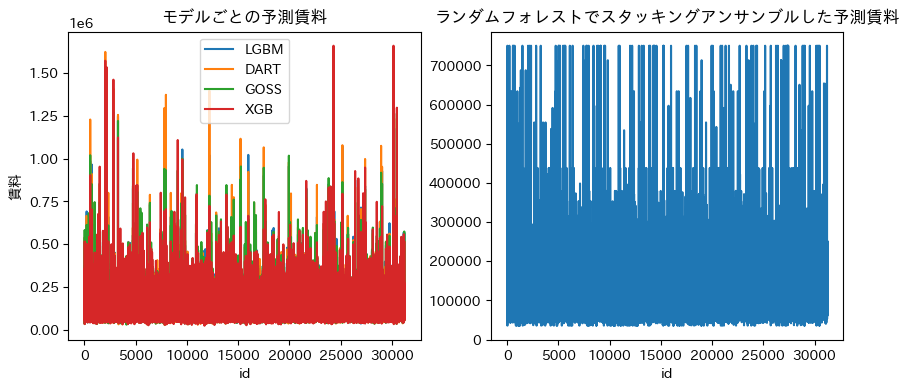

In [39]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')
ax.set_xlabel("id")
ax.set_ylabel('賃料')
ax.set_title('モデルごとの予測賃料')

ax2.plot(range(len(blend_pred)), blend_pred)
ax2.set_xlabel('id')
ax2.set_title('ランダムフォレストでスタッキングアンサンブルした予測賃料')

ax.legend(loc='best')
plt.show()

In [14]:
predicts = pd.concat([pred_LGBM,pred_DART,pred_GOSS,pred_XGB],axis=1)
predicts.corr()

,0,0,0,0
0,1.00000,0.991690,0.989630,0.970660
0,0.99169,1.000000,0.986725,0.968464
0,0.98963,0.986725,1.000000,0.976114
0,0.97066,0.968464,0.976114,1.000000
